# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [2]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


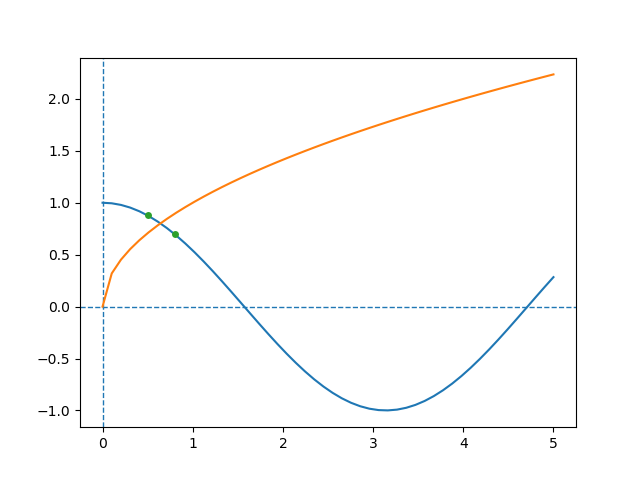

In [3]:
def f(x):
    return np.cos(x)

def fi(x, alfa):
    return x - alfa * pow(x, 0.5) + alfa * np.cos(x)

# график левой и правой части функции x^0.5 = cos(x)
xx = np.linspace(0, 5)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
ax.plot(xx, f(xx))
ax.plot(xx, pow(xx, 0.5))
#локализация корня
plt.plot([0.5, 0.8], [f(0.5), f(0.8)], 'o', ms=5, mec='none')

def fixed_point_iteration(x_0, eps):
    k = 0
    x_k = x_0
    x_k1 = fi(x_0, alf)
    while abs(x_k1 - x_k) > eps:
        x_k = x_k1
        x_k1 = fi(x_k, alf)
        k += 1
    return x_k1, k

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [6]:
alf = 1
res = fixed_point_iteration(0.5, 0.001)
print(res)

(0.641786343880407, 4)


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [12]:
def g(x):
    return x - 1 / np.tan(x)

def inv_quad_interpolation(func, point_0, point_1, point_2, eps):
    x = [point_0, point_1, point_2]
    y = [func(point_0), func(point_1), func(point_2)]
    k = 0
    while abs(x[-1] - x[-2]) > eps:
        x_k = x[-3] * y[-2] * y[-1] / (y[-3] - y[-2]) / (y[-3] - y[-1]) + \
              x[-2] * y[-3] * y[-1] / (y[-2] - y[-3]) / (y[-2] - y[-3]) + \
              x[-1] * y[-3] * y[-2] / (y[-1] - y[-3]) / (y[-1] - y[-2])
        y_k = func(x_k)
        k += 1
        x.append(x_k)
        y.append(y_k)
    return x[-1], k

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

<IPython.core.display.Javascript object>


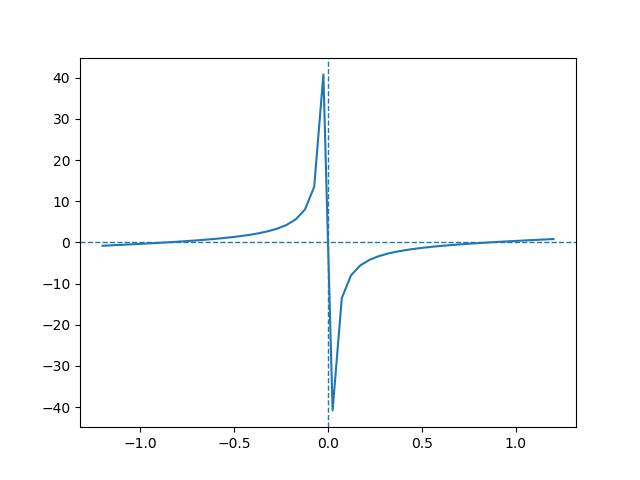

In [17]:
xx = np.linspace(-1.2, 1.2)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
ax.plot(xx, g(xx))

In [13]:
res = inv_quad_interpolation(g, 0.6, 0.8, 1, 0.001)
print(*res)
# Как видно по графику у уравнения два корня, изменим начальное приближение, чтобы определить второй корень
res1 = inv_quad_interpolation(g, -0.6, -0.8, -1, 0.001)
print(*res1)

-0.8602423965679158 141
0.8602423965679158 141


# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [24]:
def f_z(z):
    return z**3 - 1
def df_z(z):
    return 3 * z**2

def newton_raphson_method(f, df, z0, eps):
    z, z_prev, i = z0, z0 + 2 * eps, 0
    while abs(z - z_prev) > eps:
        z, z_prev, i = z - f(z) / df(z), z, i + 1
    return z, i

print(newton_raphson_method(f_z, df_z, complex(1, 1), 0.00001))

((0.9999999999999994-4.556244651765188e-16j), 8)


Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).